In [1]:
"""
#Trains a TCN on the IMDB sentiment classification task.
Output after 1 epochs on CPU: ~0.8611
Time per epoch on CPU (Core i7): ~64s.
Based on: https://github.com/keras-team/keras/blob/master/examples/imdb_bidirectional_lstm.py
"""
import numpy as np
from keras import Model, Input
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Embedding
from keras.preprocessing import sequence

from tcn import TCN

max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 32

In [2]:
import numpy as np
#x_train = np.array(x_train).reshape(len(x_train), -1)
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old
print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [4]:
y_train = np.array(y_train)
y_test = np.array(y_test)

i = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(i)
x = TCN(nb_filters=64,
        kernel_size=6,
        dilations=[1, 2, 4, 8, 16, 32, 64])(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[i], outputs=[x])

W0121 00:14:24.358053 140029782796096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0121 00:14:24.374295 140029782796096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0121 00:14:24.377922 140029782796096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0121 00:14:24.393262 140029782796096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0121 00:14:24.933230 140029782796096 de

In [5]:
# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          validation_data=[x_test, y_test])

W0121 00:14:31.025167 140029782796096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0121 00:14:31.064571 140029782796096 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 25s 1ms/step - loss: 0.4619 - acc: 0.7581 - val_loss: 0.3223 - val_acc: 0.8576
Epoch 2/50
25000/25000 [==============================] - 21s 848us/step - loss: 0.2288 - acc: 0.9115 - val_loss: 0.3706 - val_acc: 0.8511
Epoch 3/50
25000/25000 [==============================] - 21s 842us/step - loss: 0.0946 - acc: 0.9679 - val_loss: 0.5490 - val_acc: 0.8383
Epoch 4/50
25000/25000 [==============================] - 21s 835us/step - loss: 0.0498 - acc: 0.9832 - val_loss: 0.8259 - val_acc: 0.8140
Epoch 5/50
25000/25000 [==============================] - 21s 824us/step - loss: 0.0363 - acc: 0.9876 - val_loss: 0.9332 - val_acc: 0.8379
Epoch 6/50
25000/25000 [==============================] - 20s 806us/step - loss: 0.0281 - acc: 0.9902 - val_loss: 1.0288 - val_acc: 0.8359
Epoch 7/50
25000/25000 [==============================] - 21s 834us/step - loss: 0.0219 - acc: 0.9923 - val_l

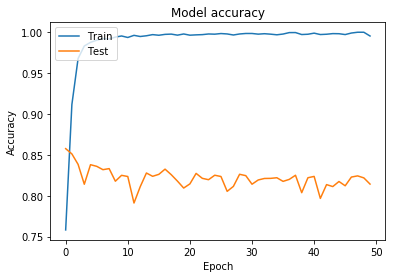

In [7]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

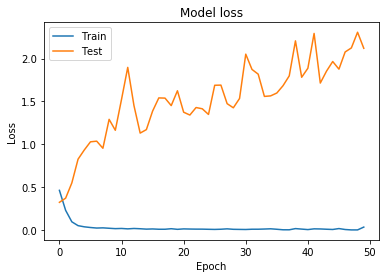

In [8]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 81.42%
